# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
3. Can linear regression be used for classification? Explain why, or why not.
4. What are signs that your linear model is over-fitting?
5. Clearly explain multi-colinearity using the two-stage least squares technique.
6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?
7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

1. A model is "linear" when it uses explanatory variables (x) to predict the outcome variable (y). This means that Y can be expressed as a linear combination of the explanatory variables; it's linear in coefficients.
2. The coefficient for a dummy variable in dummy encoding with an intercept can be interpreted as a deviation from a chosen reference category. If the color purple is the reference category, the coefficient of beta_1 for a dummy variable of green would be the difference in Y between green and the reference category purple. The coefficients are basically deviations from reference categories. In one-hot encoding without an intercept, we create separate dummy variables for each category and drop the intercept to avoid perfect multicolinearity. This means that the coefficients represent the expected value of Y for that category, not a difference from reference category. If you are interpreting the coefficients, your decision of dropping the intercept or not matters. 
3. Linear regression can be used for classification because it weights the explanatory variables to predict the outcome variables but it should be used with caution. For example, predictions with linear regression may lead to predictions that are out of range because it assumes continuous output. There are better linear models that are better than others for classification. 
4. Some signs would include that the model itself seems too complicated with too many features. If we are using too many variables that exploit unique features of the training data, we may overfit out model. Another sign is if out model performs well with out training data but has a lot more error with our test data. This would mean that the model is too complex and is fitting to the training set too closely rather than general patterns.
5. Multicollinearity occurs when two or more predictor variables are highly correlated. This means that they provide redundant information. This makes it difficult to differentiate the individual effect of each predictor on Y. In two stage least squares, the first stage consists of identifying variables that are correlated with the ones causing multicollinearity (these are endogenuous variables) but not correlated with the error term. You then regresss the endogenous variables to get predicted values for them. In stage two, you use the predicted values you got and use them as independent variables in your regression model. This will remove the multicollinearity.
6. You can incorporate non linear relationships using neural networks since they are nests of linear models. You can also use more complex polynomial terms like squares, cubes, etc. You could also incorporate logs and exponential transformations.
7. The interpretations of the intercept is the predicted value of Y when all the independent variables are 0. The slope coefficient for a variable is the change in the predicted value of Y for a unit increase of the X variable. The interpretation for a slope coefficient for a dummy variable represents the difference in y when the category that the dummy variable represents is present (coefficient of 1) or absent (coefficient of 0).

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

#### 4.1

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [33]:
heart_data = pd.read_csv("data/heart_hw.csv")
heart_data.head

<bound method NDFrame.head of      Unnamed: 0  age transplant  y
0             1   53    control  0
1             2   43    control  0
2             3   52    control  0
3             4   52    control  0
4             5   54    control  0
..          ...  ...        ... ..
98           99   30    control  1
99          100   48  treatment  1
100         101   40  treatment  1
101         102   48  treatment  1
102         103   33  treatment  1

[103 rows x 4 columns]>

In [34]:
control_group = heart_data[heart_data['transplant']=='control']
treatment_group = heart_data[heart_data['transplant']=='treatment']

#proportion of survivors in control
control_survival = control_group['y'].mean()

#proportion of survivors in treatment
treatment_survival = treatment_group['y'].mean()

average_treatment_effect = treatment_survival-control_survival

print(f"Control group: {control_survival}")
print(f"Treatment group: {treatment_survival}")
print(f"fAverage treatment effect: {average_treatment_effect}")

Control group: 0.11764705882352941
Treatment group: 0.34782608695652173
fAverage treatment effect: 0.23017902813299232


#### 4.2 

In [40]:

def slr(x,y): 
    """ Single linear regression function. """
    x_bar = np.mean(x)
    y_bar = np.mean(y)

    denominator = np.inner(x - x_bar, x - x_bar)
    if denominator == 0:
        return {'b0': np.nan, 'b1': np.nan, 'y_hat': np.nan, 'residuals': np.nan}
    
    b1 = np.inner(x-x_bar,y-y_bar)/denominator
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})

In [36]:
#print(heart_data['transplant'])
heart_data = pd.read_csv("data/heart_hw.csv")


heart_data['transplant'] = heart_data['transplant'].apply(lambda x: 1 if x == 'treatment' else 0)


y = heart_data['y']
x1 = heart_data['transplant']
#print(heart_data['transplant'])

reg1_y = slr(x1,y) # Regress y on x1
#print(reg1_y)
transplant_coeff = reg1_y['b1'] #coefficient for tranplant

intercept =  reg1_y['b0'] #intercept

print('Transplant coefficient: ', transplant_coeff)
print('Intercept: ', intercept)


Transplant coefficient:  0.23017902813299226
Intercept:  0.11764705882352944


In our linear regression model, the intercept is 0.7, which is the proportion of people who survive in the control group. The transplant coefficient represents the difference in survival probability between the treatment and control group. This number means that patients have a 1.18% higher survival probability than those who did not receive the transplant. In part 1, the rate of survival for the control group was 0.1176. For the transplant coefficient in part 1 was 0.2302 and was 0.2301 in the regression model. Both of these values are close, which means that the regression model is doing a good job at showing the true relationship between transplant and survival.

#### 4.3

In [46]:
heart_data = pd.read_csv("data/heart_hw.csv")

heart_data['transplant'] = heart_data['transplant'].apply(lambda x: 1 if x == 'treatment' else 0)


y = heart_data['y']
x1 = heart_data['transplant']
x2 = heart_data['age']

#get resid for y after regress on x1
reg1_y = slr(x1,y) # Regress y on x1
y_resid_x1 = reg1_y['residuals'] # Extract the residual for y

#get resid for x2 after regressing on x1
reg_x2_x1 = slr(x1, x2)
x2_resid_x1 = reg_x2_x1['residuals']

#regress to et age coeff
reg_y_x2 = slr(x2_resid_x1, y_resid_x1)
age_coeff = reg_y_x2['b1']
print('Age coefficient:', age_coeff)

#get resid for y after regres on x2
reg_y_x2 = slr(x2, y)
y_resid_x2 = reg_y_x2['residuals']

#get regress for x1 after regress on x2
reg_x1_x2 = slr(x2, x1)
x1_resid_x2 = reg_x1_x2['residuals']

#regress to get transplant coeff
reg_y_x1 = slr(x1_resid_x2, y_resid_x2)
transplant_coeff = reg_y_x1['b1']
print('Transplant coefficient:', transplant_coeff)


b0 = np.mean(y) - reg_y_x1['b1'] * np.mean(x1) - reg_y_x2['b1']*np.mean(x2)
print('Intercept: ', b0, '\n')


Age coefficient: -0.013607217160218645
Transplant coefficient: 0.264701686503675
Intercept:  0.6322211923403473 



The intercept changes to 0.632. This means that the baseline probabiliy of survival for the control group has decreased.

#### 4.4

In [50]:
%pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 KB 13.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Optimization terminated successfully.
         Current function value: 0.513893
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                   82
Model:                          Logit   Df Residuals:                       77
Method:                           MLE   Df Model:                            4
Date:                Mon, 24 Mar 2025   Pseudo R-squ.:                  0.1499
Time:                        12:16:14   Log-Likelihood:                -42.139
converged:                       True   LL-Null:                       -49.572
Covariance Type:            nonrobust   LLR p-value:                  0.004988
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.7967      3.033     -0.592      0.554      -7.741       4.148
transplant       

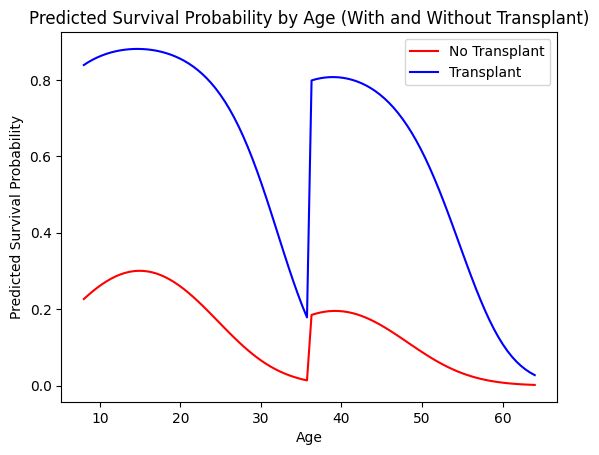

In [59]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm


heart_data = pd.read_csv("data/heart_hw.csv")
heart_data['transplant'] = heart_data['transplant'].apply(lambda x: 1 if x == 'treatment' else 0)

#adding quadratic age term
heart_data['age_squared'] = heart_data['age'] ** 2

#adding interaction
heart_data['age_transplant'] = heart_data['age'] * heart_data['transplant']

#define
X = heart_data[['transplant', 'age', 'age_squared', 'age_transplant']]
y = heart_data['y']

#train test split (80% train, 20% test)
X_train, X_test, y_train, y_test = (train_test_split(X, y, test_size=0.2, random_state=41))

#fitting a logistic regression model
X_train = sm.add_constant(X_train) #adds intercept
logit_model = sm.Logit(y_train, X_train).fit()

#summary
print(logit_model.summary())

#survival prob for range of ages
ages = np.linspace(heart_data['age'].min(), heart_data['age'].max(), 100)

plot_data = pd.DataFrame({
    'const': 1,  #intercept
    'transplant': np.tile([0, 1], len(ages)),  
    'age': np.tile(ages, 2), #age range
    'age_squared': np.tile(ages**2, 2),  #our quadtratic term
    'age_transplant': np.concatenate([ages * 0, ages * 1])  #our interaction term
})

#predicting survival probs
plot_data['predicted_survival'] = logit_model.predict(plot_data)

#plotting
plt.plot(ages, plot_data[plot_data['transplant'] == 0]['predicted_survival'], label='No Transplant', color='red')
plt.plot(ages, plot_data[plot_data['transplant'] == 1]['predicted_survival'], label='Transplant', color='blue')

plt.xlabel('Age')
plt.ylabel('Predicted Survival Probability')
plt.title('Predicted Survival Probability by Age (With and Without Transplant)')
plt.legend()
plt.show()


The predicted survival probability is much higher on average with a transplant. Around the age of 35 however, both probabilities with and without the transplant are about 0.20 or less. 

#### 4.5

My concerns about how it is build would be whether the training data contains biases in it. If it represents past biases, the model would reinforce those biases and lead to discrimination. Also, if age has a negative coefficient, older patients may be unfairly deprioritized. 

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

#### 5.1

In [109]:
pretrial_data = pd.read_csv("data/pretrial_data.csv")
pretrial_data.head

subset_pretrial_data = pretrial_data[['race','is_poor','prior_F','case_type', 'held_wo_bail','sex']]
subset_pretrial_data

,race,is_poor,prior_F,case_type,held_wo_bail,sex
0,W,NaN,0.0,F,False,M
1,B,NaN,13.0,F,False,M
2,W,NaN,0.0,M,False,M
3,B,0.0,0.0,M,False,M
4,W,0.0,0.0,F,False,F
...,...,...,...,...,...,...
22981,B,1.0,12.0,M,False,M
22982,W,NaN,NaN,M,False,F
22983,B,1.0,6.0,M,False,M
22984,B,0.0,1.0,M,False,F


#### 5.2

In [110]:
subset_pretrial_data['race_black'] = (subset_pretrial_data['race']=='B').astype(int)
print(subset_pretrial_data['race_black'])

0        0
1        1
2        0
3        1
4        0
        ..
22981    1
22982    0
22983    1
22984    1
22985    1
Name: race_black, Length: 22986, dtype: int64


/tmp/ipykernel_3544/2296720173.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_pretrial_data['race_black'] = (subset_pretrial_data['race']=='B').astype(int)


#### 5.3

In [111]:
#print(pretrial_data['race_black'])

y=subset_pretrial_data['held_wo_bail']

X=subset_pretrial_data['race_black']

X=sm.add_constant(X) #adding intercept

#running the regression (in this case OLS)
model= sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           held_wo_bail   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     154.0
Date:                Mon, 24 Mar 2025   Prob (F-statistic):           3.03e-35
Time:                        13:00:01   Log-Likelihood:                -13567.
No. Observations:               22986   AIC:                         2.714e+04
Df Residuals:                   22984   BIC:                         2.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2295      0.004     61.493      0.0

The slope coefficient for race_black is 0.0728. This means that there is 7.28% higher chance that a black person is held without bail. The R^2 of the model is 0.007. This means that only 0.7% of the variation in whether someone is held without bail is explained by the model.

#### 5.4

In [152]:
subset_pretrial_data = pretrial_data[['race','is_poor','prior_F','case_type', 'held_wo_bail','sex']]
subset_pretrial_data['race_black'] = (subset_pretrial_data['race']=='B').astype(int)
subset_pretrial_data['sex'] = subset_pretrial_data['sex'].astype('category').cat.codes
subset_pretrial_data['race'] = subset_pretrial_data['race'].astype('category').cat.codes
subset_pretrial_data['case_type'] = subset_pretrial_data['case_type'].astype('category').cat.codes
subset_pretrial_data = subset_pretrial_data.dropna()



#print(subset_pretrial_data.dtypes)

case_type_dummies = [col for col in subset_pretrial_data.columns if col.startswith("case_type")]

y=subset_pretrial_data['held_wo_bail']
y = np.asarray(y)


set = [
    ['race_black'],
    ['race_black', 'sex'],
    ['race_black', 'sex', 'is_poor'],
    ['race_black', 'sex', 'is_poor', 'prior_F'],
    ['race_black', 'sex', 'is_poor', 'prior_F'] +case_type_dummies
]


results = []

for variables in set:
    X=subset_pretrial_data[variables]
    X = sm.add_constant(X, has_constant='add') #adding intercept


    #running the regression (in this case OLS)

    model= sm.OLS(y,X).fit()

    #getting stats
    coef_black = model.params.get('race_black', None)
    r_squared = model.rsquared

    #adding to results
    results.append({
        'Variables': ', '.join(variables),
        'Coef (Black)': coef_black,
        'R^2': r_squared
    })

results_df=pd.DataFrame(results)
print(results_df)

                                      Variables  Coef (Black)       R^2
0                                    race_black      0.068436  0.005819
1                               race_black, sex      0.063120  0.016260
2                      race_black, sex, is_poor      0.036318  0.059278
3             race_black, sex, is_poor, prior_F      0.026586  0.100833
4  race_black, sex, is_poor, prior_F, case_type      0.028455  0.196171


/tmp/ipykernel_3544/3052417446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_pretrial_data['race_black'] = (subset_pretrial_data['race']=='B').astype(int)
/tmp/ipykernel_3544/3052417446.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_pretrial_data['sex'] = subset_pretrial_data['sex'].astype('category').cat.codes
/tmp/ipykernel_3544/3052417446.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

As more variables are added, the coefficient for race_black decreases and the R^2 increases. The race coefficient suggests that the effect of race becomes less pronounced when accounting for other features and th2 R^2 suggests that the overall model gets better at explaining outcomes with more predictors.

#### 5.5

 Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.

In [155]:
subset_pretrial_data['race_black_sex']= subset_pretrial_data['race_black']* subset_pretrial_data['sex']

X = subset_pretrial_data['race_black_sex']
X = sm.add_constant(X, has_constant='add')  # Add intercept

model = sm.OLS(y, X).fit()
coef_race_black_sex = model.params['race_black_sex']
r_squared = model.rsquared

print(f'Coefficient: {coef_race_black_sex},\nR squared: {r_squared}')

Coefficient: 0.05133252310900626,
R squared: 0.011114555183757813


The coefficient measures the effect of being black and a specific gender on the dependent variable of being held without bail. This suggest that the group is 5.1% more likelt to be held with no bail compared to others. The R^2 suggests that 1.1% of the variation in held without bail varianle is explained soley by the interaction term.

#### 5.6

Data-driven and automated tools like this regression model has the potential to enhance efficiency and consistency in decision-making, but there are significant concerns. These are high-stake decisions that need context. There could be bias if the models rely on biased or discriminatory data. This appraoch could use and reinforce systemic discrimination. There are also concerns about each case not being a "standard" case; in other words, every person's case is individual and complex human situations should not be simplified to patterns or strict probabilities.


**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
